# Data Preprocessing

In [1]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from scipy import stats
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset dan cek dataset
df = pd.read_csv('/content/patient_dataset.csv')

In [3]:
# Cek duplikasi dan jumlahnya
duplicate = df.duplicated().sum()
val = True
if duplicate != 0:
  print('Terdapat duplikasi data: ', val)
  print('Jumlah duplikasi: ', duplicate)
else:
  val = False
  print('Terdapat duplikasi data: ', val)
  print('Jumlah duplikasi: ', duplicate)

Terdapat duplikasi data:  True
Jumlah duplikasi:  14


In [4]:
# Menghapus duplikasi data
df.drop_duplicates(inplace=True)
# Cek duplikasi kembali
print('Jumlah duplikasi: ', df.duplicated().sum())

Jumlah duplikasi:  0


In [5]:
# Menghapus kolom yang tidak diperlukan
df = df.iloc[:, 1:]
df.head()

,Gender,Height,Weight,Index
0,Male,174.0,96.0,NaN
1,Male,189.0,87.0,Normal
2,Female,185.0,110.0,Obesity
3,Female,195.0,104.0,Overweight
4,Male,149.0,61.0,Overweight


In [6]:
# Cek jumlah missing value pada data/record
df.isnull().sum()

Gender    54
Height    31
Weight    36
Index     40
dtype: int64

In [7]:
gender_mode = df['Gender'].mode()
height_median = df['Height'].median()
weight_median = df['Weight'].median()
index_mode = df['Index'].mode()

print('Modus kolom Gender  : ', gender_mode[0])
print('Median kolom Height : ', height_median)
print('Median kolom Weight : ', weight_median)
print('Modus kolom Index   : ', index_mode[0])

Modus kolom Gender  :  Male
Median kolom Height :  171.0
Median kolom Weight :  105.0
Modus kolom Index   :  Extreme Obesity


In [8]:
# imputasi secara manual pada keempat kolom menggunakan function fillna
df['Gender'].fillna(gender_mode[0], inplace=True)
df['Height'].fillna(height_median, inplace=True)
df['Weight'].fillna(weight_median, inplace=True)
df['Index'].fillna(index_mode[0], inplace=True)

df.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [9]:
# meringkas dataset menggunakan descriptive statistics
df.describe(include='all')

,Gender,Height,Weight,Index
count,504,504.000000,504.000000,504
unique,2,NaN,NaN,6
top,Male,NaN,NaN,Extreme Obesity
freq,282,NaN,NaN,223
mean,NaN,170.509921,105.813492,NaN
std,NaN,17.728567,31.253229,NaN
min,NaN,140.000000,5.000000,NaN
25%,NaN,157.000000,82.000000,NaN
50%,NaN,171.000000,105.000000,NaN
75%,NaN,183.000000,132.250000,NaN


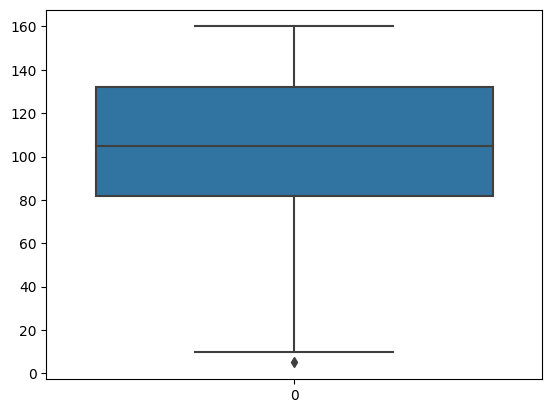

In [10]:
# memeriksa outlier pada kolom Weight
sns.boxplot(df['Weight'])
plt.show()

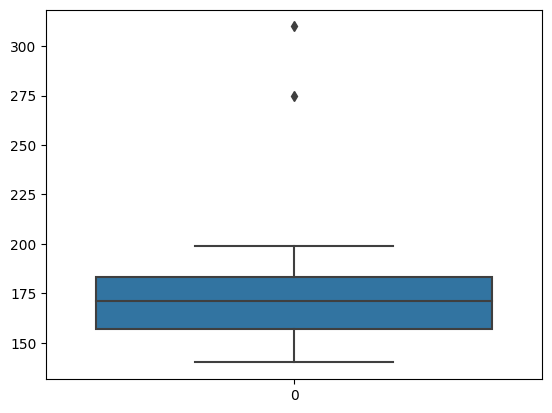

In [11]:
# memeriksa outlier pada kolom Height
sns.boxplot(df['Height'])
plt.show()

In [12]:
kolom_numerik = ['Height', 'Weight']

# menghapus outliers dengan meanfaatkan Z-Score
# jika suatu baris memiliki Z-Score > 3, maka baris tersebut dihapus karena memiliki outlier
df = df[(np.abs(stats.zscore(df[kolom_numerik])) < 3).all(axis=1)]

# ukuran dataset
df.shape

(500, 4)

In [13]:
print(df['Gender'].unique())
print(df['Index'].unique())

['Male' 'Female']
['Extreme Obesity' 'Normal' 'Obesity' 'Overweight' 'Weak' 'Extremely Weak']


In [14]:
# label encoding secara manual dengan memanfaatkan fuction map()

# nominal
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

# ordinal
df['Index'] = df['Index'].map({'Extremely Weak':0,
                                         'Weak':1,
                                         'Normal':2,
                                         'Overweight':3,
                                         'Obesity':4,
                                         'Extreme Obesity':5})

<ipython-input-14-2987c4d7f387>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
<ipython-input-14-2987c4d7f387>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Index'] = df['Index'].map({'Extremely Weak':0,


In [15]:
print(df['Gender'].unique())
print(df['Index'].unique())

[0 1]
[5 2 4 3 1 0]


In [16]:
df.head()

,Gender,Height,Weight,Index
0,0,174.0,96.0,5
1,0,189.0,87.0,2
2,1,185.0,110.0,4
3,1,195.0,104.0,3
4,0,149.0,61.0,3


In [17]:
X = df.drop(labels='Index', axis=1).values
y = df['Index'].values

In [18]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([ 12,  20,  59,  63, 123, 223]))

In [19]:
sm = SMOTENC(random_state=42, categorical_features=[0]) # feature ke nol (kolom Gender) merupakan feature kategorikal
X_res, y_res = sm.fit_resample(X, y)

In [20]:
np.unique(y_res, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([223, 223, 223, 223, 223, 223]))

In [21]:
# ukuran feature dan label setelah dilakukan oversampling
print(X_res.shape)
print(y_res.shape)

(1338, 3)
(1338,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

print('Train set size : ', X_train.shape, y_train.shape)
print('Test set size  : ', X_test.shape, y_test.shape)

Train set size :  (936, 3) (936,)
Test set size  :  (402, 3) (402,)


In [23]:
scaler = StandardScaler()
scaler.fit(X_train)

# Standardization Feature
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)